In [1]:
#imports

import os
import numpy as np
from tensorflow.keras import layers, models


In [2]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(85, activation='relu'))
model.add(layers.Dense(42, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 85)             │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 42)             │         3,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           242 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,306 (75.41 KB)

 Trainable params: 19,306 (75.41 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
'''
Layer 0 is conv => 2 arrays => 3x3x1 and 1 bias
Layer 3 is dense => 2 arrays => 169x85 and 85 bias
so on..
'''
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeights"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [4]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to InitWeights\layer_number_0.npz
Layer 1 has no weights to save.
Layer 2 has no weights to save.
Saved parameters for layer 3 to InitWeights\layer_number_3.npz
Saved parameters for layer 4 to InitWeights\layer_number_4.npz
Saved parameters for layer 5 to InitWeights\layer_number_5.npz
Saved parameters for layer 6 to InitWeights\layer_number_6.npz
Saved parameters for layer 7 to InitWeights\layer_number_7.npz
Saved parameters for layer 8 to InitWeights\layer_number_8.npz
Saved parameters for layer 9 to InitWeights\layer_number_9.npz
Saved parameters for layer 10 to InitWeights\layer_number_10.npz


In [5]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} weights: {weights}")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 weights: [array([[[[ 0.47888255]],

        [[ 0.34206253]],

        [[-0.4035244 ]]],


       [[[-0.5721052 ]],

        [[-0.5004457 ]],

        [[-0.01148999]]],


       [[[-0.09677941]],

        [[ 0.5753714 ]],

        [[ 0.11998272]]]], dtype=float32), array([0.], dtype=float32)]
Layer 1 has no weights.
Layer 2 has no weights.
Layer 3 weights: [array([[ 0.09532662, -0.13371877,  0.08630037, ..., -0.15252507,
        -0.08887554,  0.03949901],
       [-0.10160206, -0.08485049, -0.06298939, ...,  0.14393929,
         0.15021434,  0.0185754 ],
       [ 0.03844704,  0.11884254,  0.05529456, ..., -0.08461289,
        -0.07811733, -0.08405843],
       ...,
       [ 0.04290543,  0.11020488, -0.12669799, ...,  0.10029748,
        -0.12787883,  0.10670489],
       [-0.07029581,  0.01276541, -0.04230984, ...,  0.05654575,
        -0.14294176,  0.14496607],
       [-0.10577926,  0.03080966, -0.08298727, ..., -0.10449486,
        -0.04176424,  0.08170639]], dtype=float32), arra

In [6]:
x=model.get_weights()[16]
print((x))

[[-0.08528328]
 [-0.45619076]]


In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot kernel
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

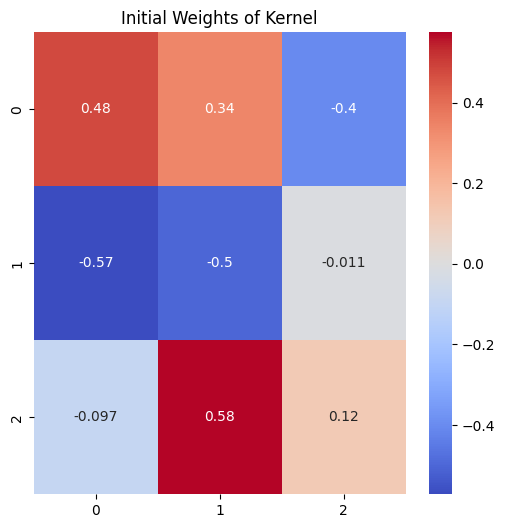

In [8]:
# After training, extract and plot the kernel weights
final_kernel = model.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Initial Weights of Kernel')